# Fill two-cell hole in iceshelf on east side of peninsula

Identified by Nico: (i, j ) =  ( 904:905, 281)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
domain_current = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc')
bathy_current  = xr.open_dataset(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20250715.nc')
ds_current     = xr.open_dataset(f'{base_dir}output/CESM2_3hwind_1920_t0_0955/files0/eANT025.L121_1m_19500101_19501231_icemod_compressed.nc')

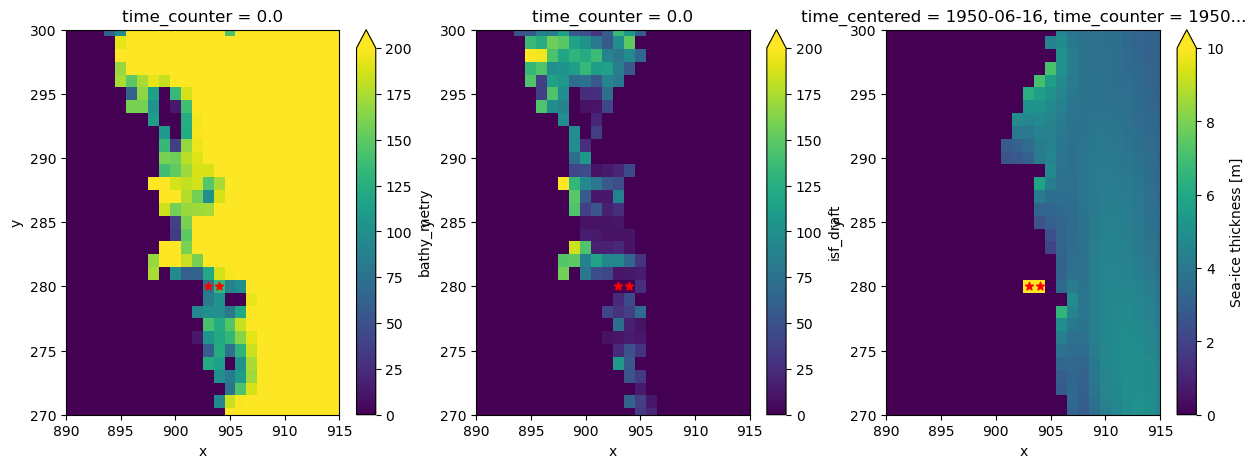

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

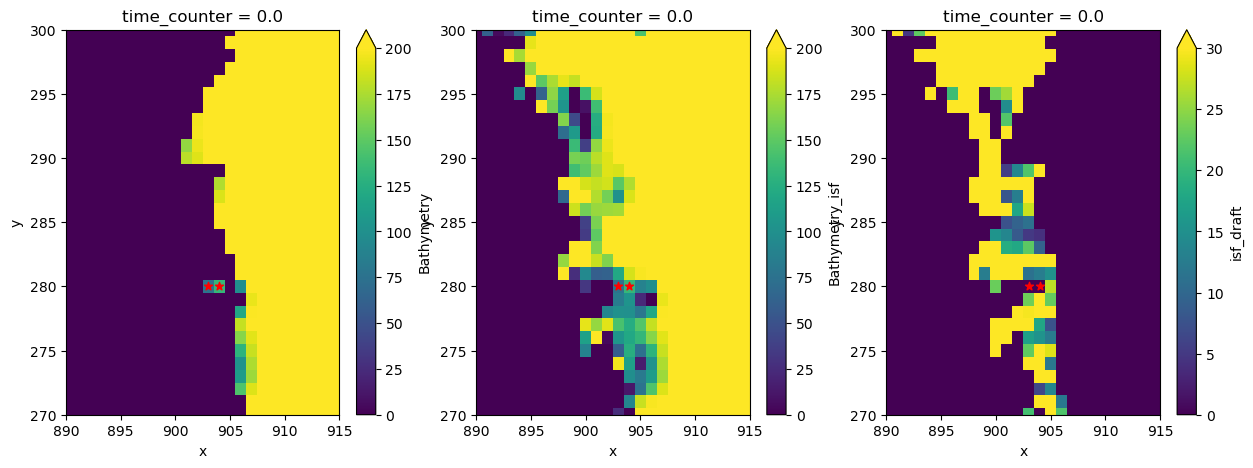

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=30, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

In [29]:
print(bathy_current.Bathymetry.isel(x=904, y=280).values)
print(bathy_current.Bathymetry_isf.isel(x=904, y=280).values)
print(bathy_current.isf_draft.isel(x=904, y=280).values)

133.51256560319652
133.51256560319652
0.0


Fill two problematic cells (since it's connected to areas that are land, probably easiest to just make into land)

In [41]:
bathy_new = bathy_current.copy()

make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[280, 903:905] = 1
bathy_new['Bathymetry'] = xr.where(make_shelf==1, 0, bathy_current['Bathymetry'])
bathy_new['Bathymetry_isf'] = xr.where(make_shelf==1, 0, bathy_current['Bathymetry_isf'])

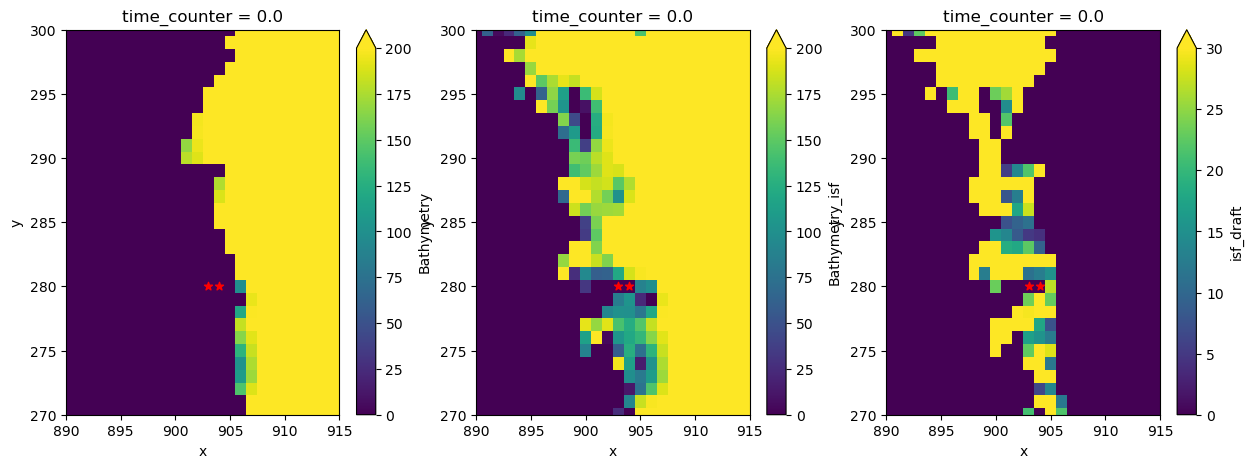

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
bathy_new.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_new.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_new.isf_draft.plot(ax=ax[2], vmin=0, vmax=30, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

In [43]:
bathy_new.to_netcdf(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260108.nc')

### Have a look at the new domain_cfg file generated by the NEMO DOMAINcfg tool:

In [44]:
domain_new = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20260108.nc')

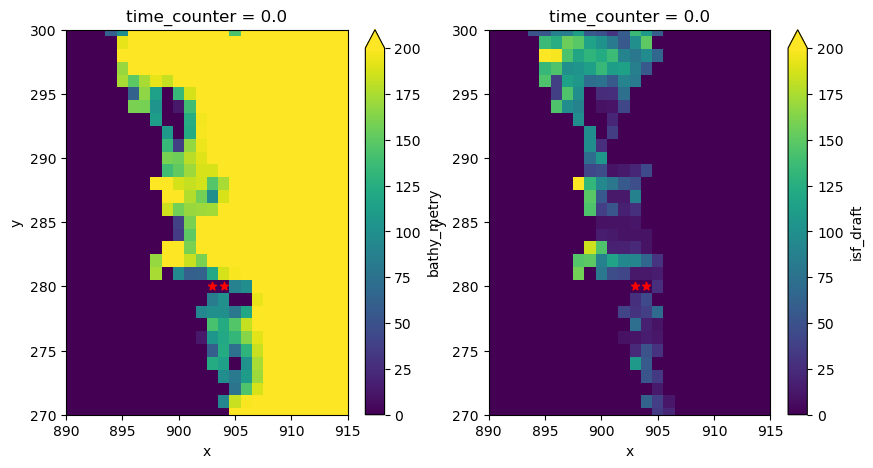

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
domain_new.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_new.isf_draft.plot(ax=ax[1], vmin=0, vmax=200, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

## Plus fill any other holes 
i.e. the one identified by Alethea

Nico: (382, 158), (383, 158)

In [55]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
domain_current = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20260108.nc')
bathy_current  = xr.open_dataset(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260108.nc')
ds_current     = xr.open_dataset(f'{base_dir}output/CESM2_3hwind_1920_t0_0955/files0/eANT025.L121_1m_19500101_19501231_icemod_compressed.nc')

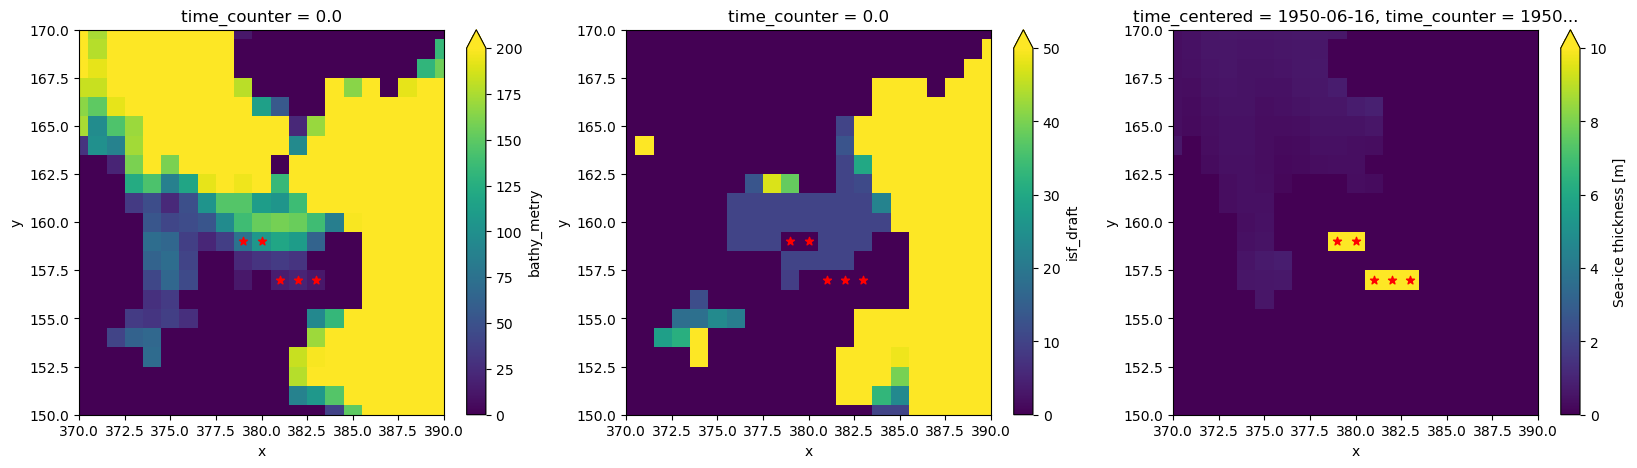

In [3]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=50, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([381, 382, 383], [157, 157, 157], marker='*', color='r')
    axis.scatter([379, 380], [159, 159], marker='*', color='r')

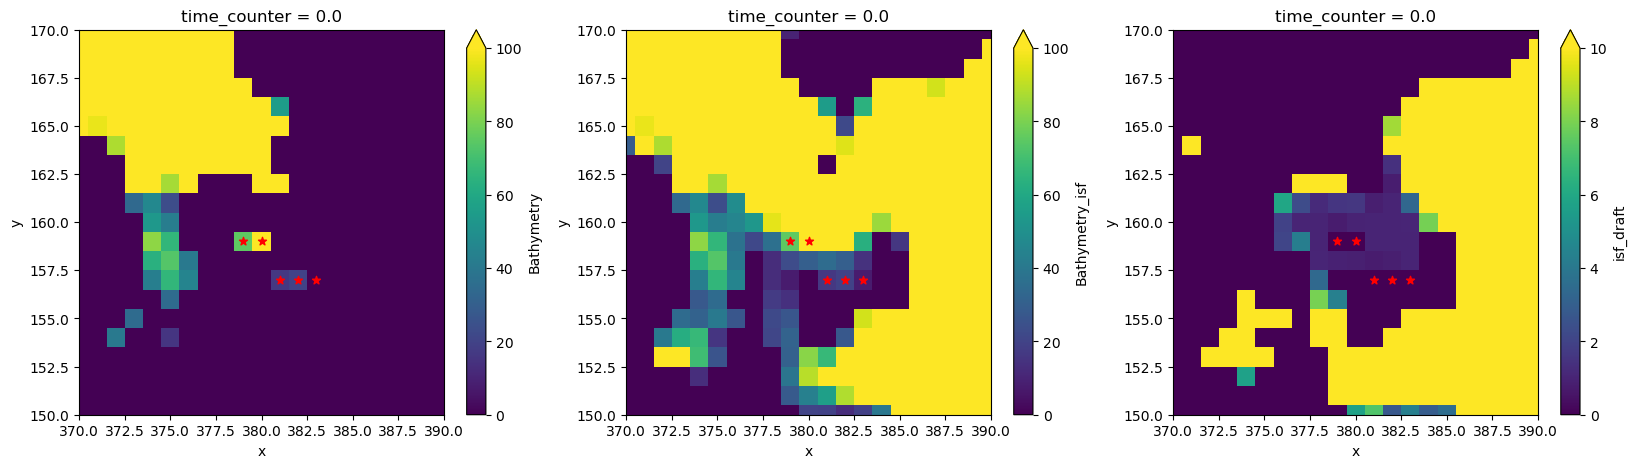

In [26]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=100, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([381, 382, 383], [157, 157, 157], marker='*', color='r')
    axis.scatter([379, 380], [159, 159], marker='*', color='r')

In [91]:
bathy_new = bathy_current.copy()
xval=slice(379,381)
yval=159

# open upper row as cavity
make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[yval, xval] = 1
bathy_new['Bathymetry']  = xr.where(make_shelf==1, 0, bathy_current['Bathymetry'])
bathy_new['isf_draft'].values[yval,xval] = bathy_current['isf_draft'].values[yval-1,xval] # fill with values just south

# and fill lower row as land
xval=slice(381,384)
yval=157
make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[yval, xval] = 1
bathy_new['Bathymetry']     = xr.where(make_shelf==1, 0, bathy_new['Bathymetry'])
bathy_new['Bathymetry_isf'] = xr.where(make_shelf==1, 0, bathy_new['Bathymetry_isf'])
bathy_new.to_netcdf(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260121.nc')

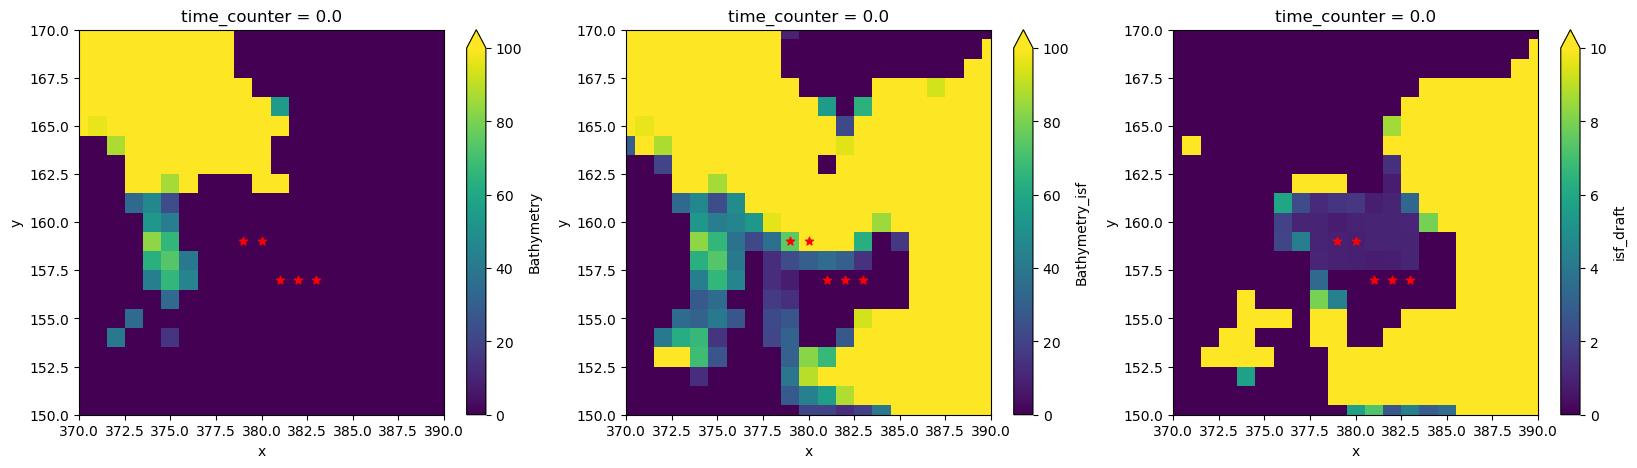

In [49]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
bathy_new.Bathymetry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
bathy_new.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=100, **kwags)
bathy_new.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([381, 382, 383], [157, 157, 157], marker='*', color='r')
    axis.scatter([379, 380], [159, 159], marker='*', color='r')

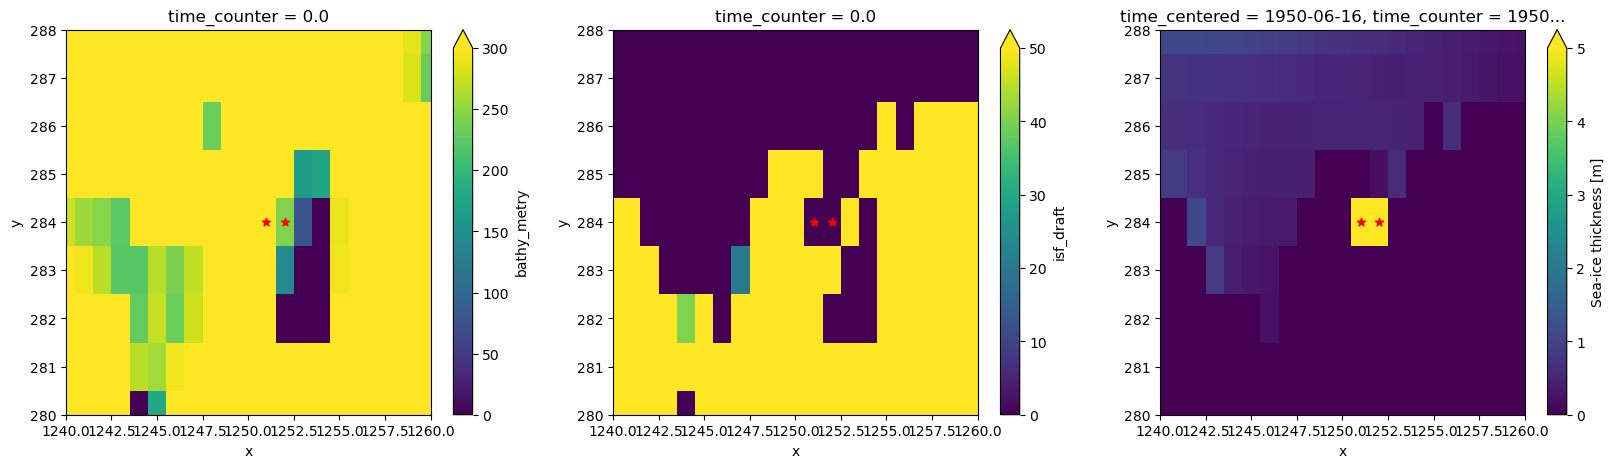

In [54]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(280,288), 'xlim':(1240,1260)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=300, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=50, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=5, **kwags)

for axis in ax.ravel():
    axis.scatter([1251, 1252], [284, 284], marker='*', color='r')

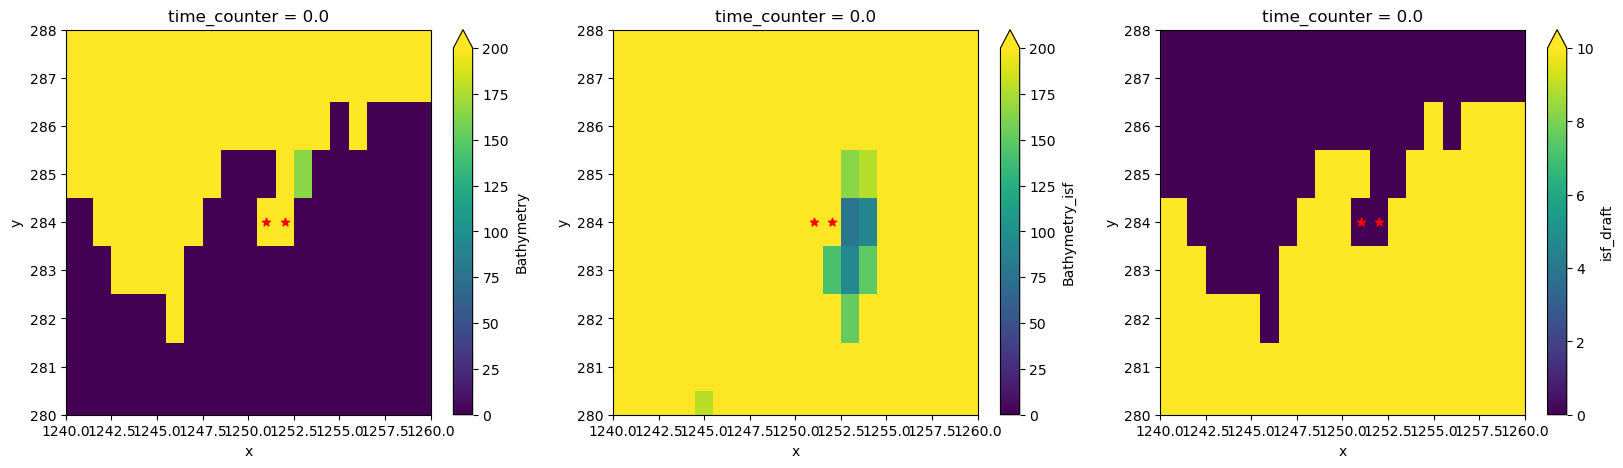

In [51]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(280,288), 'xlim':(1240,1260)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([1251, 1252], [284, 284], marker='*', color='r')

In [178]:
from scipy.ndimage import label, binary_dilation

def find_isolated_ocean_features(ds, bathy_var='bathy_metry', isf_var='isf_draft', threshold=0.70):
    # Identifies clusters or single cells of open ocean that are  mostly surrounded by ice shelf cells.
    
    # 1. Create binary masks
    # Candidates: Ocean points with no ice shelf
    is_ocean_candidate = (ds[bathy_var] > 0) & (ds[isf_var] == 0)
    # Surrounders: Ice shelf points
    is_isf = (ds[isf_var] > 0)
    
    # 2. Label connected components (clusters)
    # Using a 3x3 structure (connectivity=2) to include diagonal neighbors
    structure = np.ones((3, 3))
    labeled_array, num_features = label(is_ocean_candidate.values, structure=structure)
    
    # Initialize an empty mask for our results
    isolated_mask = np.zeros_like(labeled_array, dtype=bool)
    
    # 3. Analyze each cluster/feature
    for i in range(1, num_features + 1):
        # Create a mask for just this specific cluster
        cluster_mask = (labeled_array == i)
        
        # Find the boundary: Dilate the cluster and subtract the original cluster
        dilated = binary_dilation(cluster_mask, structure=structure)
        boundary_mask = dilated & ~cluster_mask
        
        # Calculate how many boundary pixels are actually ice shelves
        total_boundary_count = np.sum(boundary_mask)
        if total_boundary_count == 0: continue
            
        isf_boundary_count = np.sum(is_isf.values[boundary_mask])
        
        # Surround ratio (1.0 = perfectly surrounded by ice shelves)
        surround_ratio = isf_boundary_count / total_boundary_count
        
        if surround_ratio >= threshold:
            isolated_mask[cluster_mask] = True
            
    # 4. Return as an xarray DataArray for easy mapping/subsetting (domain_cfg needs to have nav_lev removed for this to work)
    return xr.DataArray(isolated_mask, coords=ds.coords, dims=ds.dims)

In [186]:
domain_new = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20260108.nc').isel(nav_lev=0).squeeze()

In [187]:
# Example Usage:
isolated_features = find_isolated_ocean_features(domain_new, threshold=0.70)
print(int(isolated_features.sum()))
if int(isolated_features.sum()) > 0:
    ds_isolated = domain_new.where(isolated_features, drop=True)
indices = np.argwhere(isolated_features.values!=0)

2


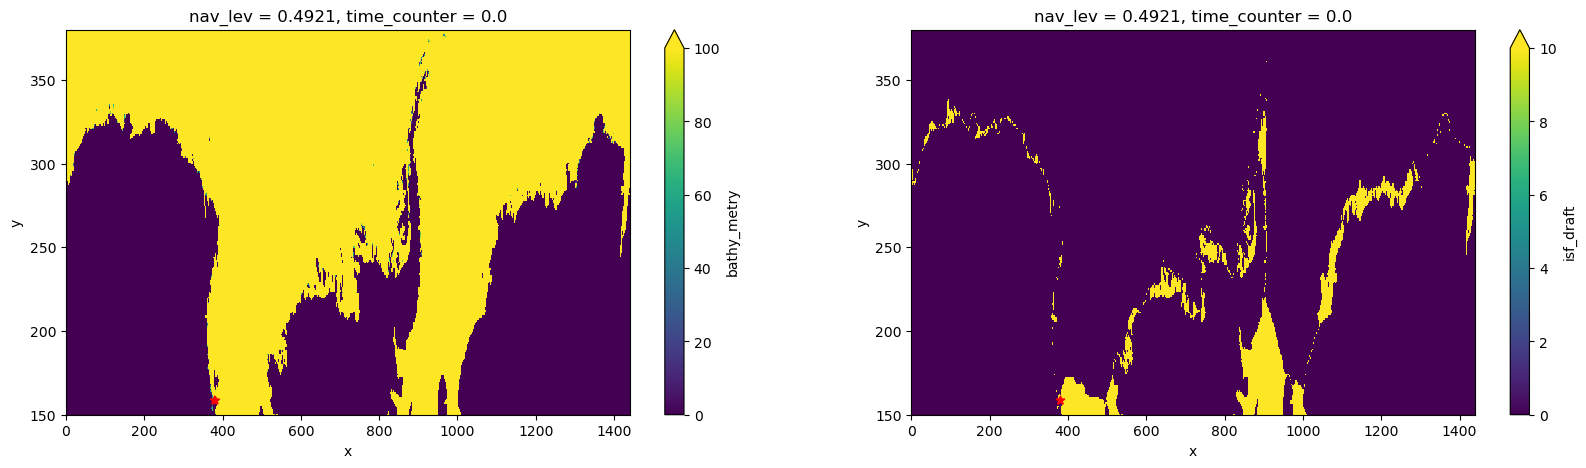

In [181]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
kwags = {'ylim':(150,380), 'xlim':(0,None)}
domain_new.bathy_metry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
domain_new.isf_draft.plot(ax=ax[1], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    for coord in indices:
        axis.scatter(coord[1], coord[0], marker='*', color='r')

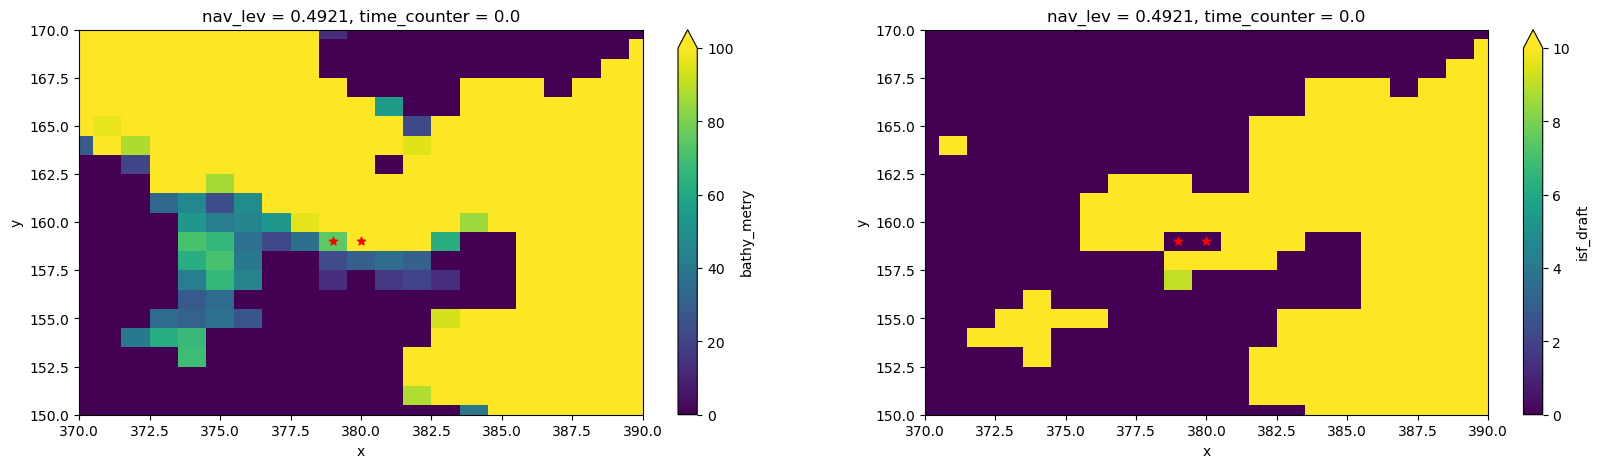

In [183]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
domain_new.bathy_metry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
domain_new.isf_draft.plot(ax=ax[1], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    for coord in indices:
        axis.scatter(coord[1], coord[0], marker='*', color='r')